# MATH 382 - Fall 2021
## Scientific Computing
Nicholas Zermeno

<hr>

# Final Project: PCA and K-means Clustering

<hr>


In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import time

import random as rnd

In [5]:
data = np.loadtxt('../math382_final/data/seeds_dataset.txt')
n, d1 = data.shape
d = d1 - 1

X = data[:,0:d]
print('data shape:', data.shape)

data shape: (210, 8)


In [6]:
def myPCs(X,p):
    n, d = X.shape
    M = X.mean(axis = 0)
    S = np.std(X,axis = 0)
    Z = (X - M)/S
    Sigma = Z.T.dot(Z)/(n-1)
    l, V = np.linalg.eig(Sigma)
    print('l =', l, '\n')
    total_sum = np.sum(l)
    Vp = V[:,0:p]
    
    return Z, Vp

p = 2
Z, Vp = myPCs(X,p)

l = [5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 8.16283865e-04 5.35755786e-03] 



In [7]:

Zp = Z.dot(Vp)

print('Zp.shape =', Zp.shape, '\n')
print('Zp[0:4, :] =', Zp[:5,:], '\n')

Zp.shape = (210, 2) 

Zp[0:4, :] = [[ 0.31704705 -0.78366902]
 [-0.00338618 -1.91321367]
 [-0.45944334 -1.90722525]
 [-0.59193565 -1.93106922]
 [ 1.10291005 -2.06809003]] 



In [8]:

def centroid_init(Z,K):

    n, p = Z.shape
    c_indx = np.zeros(K, 'int')
    
    a = 0
    b = int(n/K - 1)
    
    for k in range(0,K):
        c_indx[k] = rnd.randint(a,b)
        a = b + 1 
        b = n * (k + 2)/K - 1
        
    C = np.zeros((K,d), 'double')
    C = Z[c_indx,:]
    
    return C, c_indx


K = 3
C, c0_indx = centroid_init(Zp,K)

print('Coordinates of initial centroids of clusters:', '\n')
print('C =', C, '\n')
print('Randomly selected data points as initial centroids:', '\n')
print('c0_indx =', c0_indx, '\n')

Coordinates of initial centroids of clusters: 

C = [[-1.55784828 -1.88300511]
 [ 2.76708163  0.79568413]
 [-1.45963267 -1.75368601]] 

Randomly selected data points as initial centroids: 

c0_indx = [ 64  93 199] 



In [13]:

def cluster_membership(Z,C):

    K = C.shape[0]
    n, p = Z.shape
    D = np.zeros(K, 'double')
    member_iter = np.ones((n,1), 'int')

    for i in range(0,n): 
        for k in range(0,K):
            D[k] = np.linalg.norm(C[k,:] - Z[i,:])
        member_iter[i,0] = D.argmin() + 1
    return member_iter

member_iter = cluster_membership(Zp,C)

print('member_iter[:5,0] =', member_iter[:5,0], '\n')
print('member_iter[-5:,0] =', member_iter[-5:,0], '\n')

member_iter[:5,0] = [1 1 1 1 1] 

member_iter[-5:,0] = [3 3 3 3 3] 



In [14]:

def centroid_update(Z, member_iter, K):

    n, p = Z.shape
    C = np.zeros((K, p), 'double')
    cluster_index = np.zeros(n, 'bool')

    for k in range(0,K):
        cluster_index = (member_iter == k+1) 
        C[k,:] = Z[cluster_index[:,-1],:].mean(axis = 0) 
        
    return C

C = centroid_update(Zp,member_iter, 3)
print('C =', C, '\n')

C = [[-0.16708661 -1.09332616]
 [ 2.71694777  0.42326265]
 [-2.27840583  0.46917101]] 



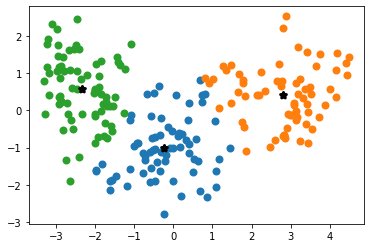

In [15]:
max_iter = 100
K = 3
membership = np.ones((n, max_iter)) 

cluster_index = np.ones((n,K), 'bool')


C, c0_indx = centroid_init(Zp, K)
j = 1
member_change = 1

z1 = Zp[:,0]
z2 = Zp[:,1]

# (8) above:
while j < max_iter and member_change > 0: 

    member_change = 0 # (8A) above
    member_iter = cluster_membership(Zp,C)
    C = centroid_update(Zp,member_iter, 3)
    membership[:,j] = member_iter[:,0]

     # (8E) above:
    for m in range(0,n):
        if membership[m,j] != membership[m,j-1]:
            member_change += 1
    
    plt.figure(1)
    plt.clf()

    for k in range(0,K):
        cluster_index[:,k] = (membership[:,j] == k + 1)
        plt.scatter(z1[cluster_index[:,k]],z2[cluster_index[:,k]], linewidths = 2) 

    plt.scatter(C[:,0], C[:,1], c = 'k', marker = '*', linewidths=3) 

    outfile = "frames/clusters_%0.3d.png" % j 
    plt.savefig(outfile) 

    j += 1 